# PS1 Ignasi Merediz-Solà - Quantitative Macroeconomics

In [2]:
#Set the directory of the folder and import the needed packages
import os 
os.chdir("C:/Users/ignas/Desktop/IDEA 2nd/1st trim/Quan Macro/Problem Sets/Problem Set 1")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#We import the CPS data
data = pd.read_csv("cps_data.txt")

In [6]:
#We set the dates of the for each of the variables which will be later needed to do the graphs
data.drop(data[(data["EMPSTAT"] == 32)
                       | (data["EMPSTAT"] == 34)
                       | (data["EMPSTAT"] == 36)
                       | (data["EMPSTAT"] == 0)
                       | (data["EMPSTAT"] == 1)].index, inplace=True)


In [7]:
#Now, we set which individuals are employed and unemployed
emp_dict = {10 : 1,
          12 : 1,
          21 : 0,
          22 : 0}

#We do the same for the education level
educ_dict = {10 : 1,
             20: 1,
             30: 1,
             71: 1,
             73: 2,
             111: 3,
             123: 4,
             125: 4}

In [9]:
#We change the new dictionary created
data["EmpStatus"] = data["EMPSTAT"].map(emp_dict)
data["EduLevel"] = data["EDUC"].map(educ_dict)
#We create a variable for the workers that are employed
employed = data[data["EmpStatus"] == 1]
#Similarly, we create a variable for the unemployed ones
unemployed = data[data["EmpStatus"] == 0]

In [10]:
#We create the monthly rate for the employed and the unemployed, but first we need to create a dates variable
dates = pd.Series(pd.date_range(start='2018/01', periods=32, freq='M'))
emp_monthly = employed[["YEAR", "MONTH", "EmpStatus"]].groupby(["YEAR", "MONTH"]).count()
emp_monthly = emp_monthly.set_index(dates)
unemp_monthly = unemployed[["YEAR", "MONTH", "EmpStatus"]].groupby(["YEAR", "MONTH"]).count()
unemp_monthly = unemp_monthly.set_index(dates)

In [15]:
#We apply the definition of employment rate
emp_rate = emp_monthly["EmpStatus"] / \
           (emp_monthly["EmpStatus"] + unemp_monthly["EmpStatus"])
emp_rate = pd.DataFrame(emp_rate)

In [16]:
#We can do the first graph, but first we have to create a set of dummy variables 
monthly_dummies = pd.get_dummies(emp_rate.index.month, drop_first=True)
monthly_dummies
#And we have to create the linear predicitons to compare it with the actual values
model = LinearRegression()
model.fit(monthly_dummies[:-8],emp_rate["EmpStatus"][:-8])
predictions = model.predict(monthly_dummies[-8:])
predicted_emp = emp_rate["EmpStatus"][:-8]
predicted_emp = pd.concat([predicted_emp, pd.Series(predictions)])
predicted_emp = predicted_emp.reset_index()
predicted_emp = predicted_emp.drop(["index"], axis = 1)
predicted_emp["Date"] = dates
predicted_emp = predicted_emp.set_index("Date")

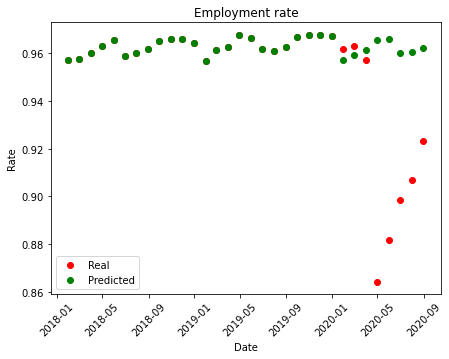

In [17]:
#Employment graph
plt.figure(figsize=(7,5))
plt.plot(dates, emp_rate, 'or', label='Real')
plt.plot(dates, predicted_emp, 'og', label='Predicted')
plt.title('Employment rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('Employmentrate.png')

plt.show()

In [1]:
#We calculate the employment rate by education level
#Employment by education group
employed_EDU = employed[["YEAR", "MONTH", "EduLevel", "EmpStatus"]].groupby(["YEAR", "MONTH","EduLevel"]).count()
employed_EDU = employed_EDU.reset_index()
employed_EDU = employed_EDU.set_index(["YEAR", "MONTH"])
#Unemployment by education group
unemployed_EDU = unemployed[["YEAR", "MONTH", "EduLevel", "EmpStatus"]].groupby(["YEAR", "MONTH","EduLevel"]).count()
unemployed_EDU = unemployed_EDU.reset_index()
unemployed_EDU = unemployed_EDU.set_index(["YEAR", "MONTH"])
unemployed_EDU = unemployed_EDU.rename(columns={"EmpStatus":"UneStatus"})

#We combine all the variable we have just created
total_labour = pd.concat([employed_EDU[["EduLevel", "EmpStatus"]], unemployed_EDU["UneStatus"]], axis=1, join="inner")
total_labour["emp_rate"] = total_labour.EmpStatus /\
                            (total_labour.EmpStatus + total_labour.UneStatus)

NameError: name 'employed' is not defined

In [18]:
#Plot employment level by education level
plt.figure(figsize=(7,5))
edu_level_1 = total_labour[total_labour['EduLevel'] == 1]
plt.plot(dates, edu_level_1["emp_rate"], '-r', label='<HS')
edu_level_2 = total_labour[total_labour['EduLevel'] == 2]
plt.plot(dates, edu_level_2["emp_rate"], '-y', label='HS')
edu_level_3 = total_labour[total_labour['EduLevel'] == 3]
plt.plot(dates, edu_level_3["emp_rate"], '-g', label='College')
edu_level_4 = total_labour[total_labour['EduLevel'] == 4]
plt.plot(dates, edu_level_4["emp_rate"], '-b', label='> College')

plt.title('Employment rate by education level')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('EmploymentrateEDU.png')

plt.show()

NameError: name 'total_labour' is not defined

<Figure size 504x360 with 0 Axes>

In [22]:
#Graph by the ability of the workers to telework
#First, we use another dataset to set the ability of the workers to telework
telework = pd.read_csv("Data_2.txt")
telework.drop(telework[(telework["WRKHOMEABLE"] == 99)
                       | (telework["WRKHOMEABLE"] == 98)
                       | (telework["IND_CPS8"] == 9999)
                       | (telework["IND_CPS8"] == 99999)].index, inplace=True)
telework = telework.dropna()
telework

,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE
5,2018,20180101180087,1,1,7.057540e+06,130,251,8270,0.0
8,2018,20180101180145,1,1,3.904603e+06,150,251,8170,1.0
11,2018,20180101180507,1,1,6.838463e+06,140,131,2980,1.0
15,2018,20180101180532,1,1,3.834468e+06,110,220,7380,1.0
17,2018,20180101180549,1,1,6.950850e+06,111,9999,6672,1.0
...,...,...,...,...,...,...,...,...,...
9582,2018,20181212182252,1,1,1.340769e+07,150,250,8190,1.0
9583,2018,20181212182254,1,1,2.850819e+07,110,300,9480,1.0
9584,2018,20181212182263,1,1,6.570226e+06,127,300,9480,0.0
9585,2018,20181212182273,1,1,4.242712e+06,190,9999,3895,0.0


In [25]:
a = telework.groupby("IND_CPS8")["WRKHOMEABLE"].sum()
a = a.apply(lambda x: 100 * (x / a.sum()))
a.sum()
a = a.sort_values()
a = a.cumsum()
teledict = a.to_dict()
telework["TWAbility"] = telework["IND_CPS8"].map(teledict)

In [27]:
#Ability to telework
can_telework = telework[telework["TWAbility"] >= 50]
cannot_telework = telework[telework["TWAbility"] < 50]
can_telework["IND_CPS8"].keys

<bound method Series.keys of 15      7380
18      7270
21      7280
23      9470
32       770
        ... 
9566    7870
9570     770
9574     770
9577    6990
9582    8190
Name: IND_CPS8, Length: 1833, dtype: int64>

In [28]:
te_keys = dict.fromkeys(can_telework["IND_CPS8"], 1)
te_keys.update(dict.fromkeys(cannot_telework["IND_CPS8"], 0))
employed["Telework"] = employed["IND"].map(te_keys)
unemployed["Telework"] = unemployed["IND"].map(te_keys)

<ipython-input-28-09fae59f97b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed["Telework"] = employed["IND"].map(te_keys)
<ipython-input-28-09fae59f97b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployed["Telework"] = unemployed["IND"].map(te_keys)


In [29]:
#We now calculate the employment rate for each type of workers
telework_emp = employed.groupby(["YEAR", "MONTH", "Telework"]).count()
telework_une = unemployed.groupby(["YEAR", "MONTH", "Telework"]).count()
telework_emp.head()
emp_rate_tw = telework_emp["EmpStatus"] / \
           (telework_emp["EmpStatus"] + telework_une["EmpStatus"])

#Not ability to telework are in the even positions, ability to telework in the odds ones.
evens = list(np.arange(0, 64, 2))
odds = list(np.arange(1, 64, 2))
notele_emp = emp_rate_tw.iloc[evens]
yestele_emp = emp_rate_tw.iloc[odds]

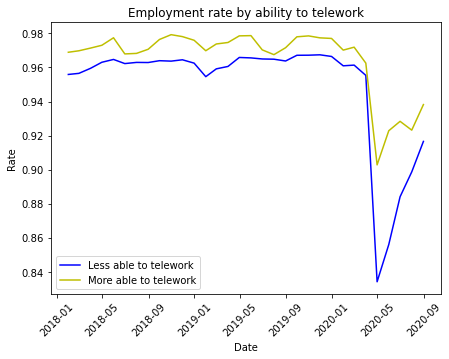

In [30]:
plt.figure(figsize=(7,5))
plt.plot(dates, notele_emp, '-b', label='Less able to telework')
plt.plot(dates, yestele_emp, '-y', label='More able to telework')
plt.title('Employment rate by ability to telework')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('EmploymentrateTELEWORK.png')

plt.show()

In [32]:
#Employment rate by occupation (1 = self-employed, 2 = private sector, 3 = government)
worker_class = {
    13 : 1,
    14 : 1,
    22 : 2,
    23 : 2,
    25 : 3,
    26 : 3,
    27 : 3,
    28 : 3,
}

employed["WorkerClass"] = employed["CLASSWKR"].map(worker_class)
unemployed["WorkerClass"] = unemployed["CLASSWKR"].map(worker_class)
worker_emp = employed.groupby(["YEAR", "MONTH", "WorkerClass"]).count()
worker_unemp = unemployed.groupby(["YEAR", "MONTH", "WorkerClass"]).count()
emp_rate_worker = worker_emp["EmpStatus"] / \
           (worker_emp["EmpStatus"] + worker_unemp["EmpStatus"])
emp_rate_worker = emp_rate_worker.reset_index().set_index(["YEAR","MONTH"])

<ipython-input-32-50436a039cb3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed["WorkerClass"] = employed["CLASSWKR"].map(worker_class)
<ipython-input-32-50436a039cb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployed["WorkerClass"] = unemployed["CLASSWKR"].map(worker_class)


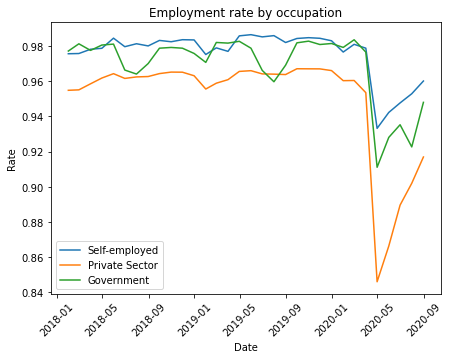

In [33]:
#Plotting by industry
plt.figure(figsize=(7,5))
worker_rate_1 = emp_rate_worker[emp_rate_worker["WorkerClass"] == 1]
plt.plot(dates, worker_rate_1["EmpStatus"], label='Self-employed')
worker_rate_2 = emp_rate_worker[emp_rate_worker["WorkerClass"] == 2]
plt.plot(dates, worker_rate_2["EmpStatus"], label='Private Sector')
worker_rate_3 = emp_rate_worker[emp_rate_worker["WorkerClass"] == 3]
plt.plot(dates, worker_rate_3["EmpStatus"], label='Government')

plt.title('Employment rate by occupation')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('EmploymentrateOCC.png')

plt.show()

In [294]:
# Average weekly hours
avg_weekly_hours = employed[employed["AHRSWORKT"]<999].groupby(["YEAR", "MONTH"])["AHRSWORKT"].mean()
avg_weekly_hours = avg_weekly_hours.reset_index().drop(["YEAR", "MONTH"], axis=1)
avg_weekly_hours["Date"] = dates
avg_weekly_hours = avg_weekly_hours.set_index("Date")

#We do the prediction for the average weekly hours
model_hrs = LinearRegression()
model_hrs.fit(monthly_dummies[:-8],avg_weekly_hours["AHRSWORKT"][:-8])
predictions_hrs = model_hrs.predict(monthly_dummies[-8:])
predicted_hrs = avg_weekly_hours["AHRSWORKT"][:-8]
predicted_hrs = pd.concat([predicted_hrs, pd.Series(predictions_hrs)])
predicted_hrs = predicted_hrs.reset_index()
predicted_hrs = predicted_hrs.drop(["index"], axis = 1)
predicted_hrs["Date"] = dates
predicted_hrs = predicted_hrs.set_index("Date")

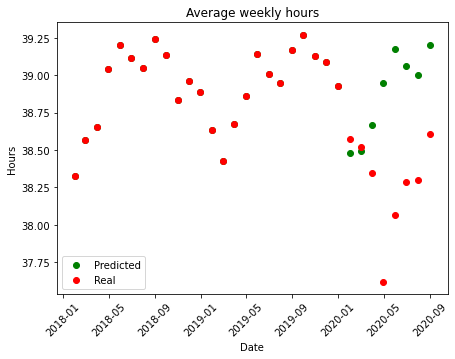

In [321]:
plt.figure(figsize=(7,5))
plt.plot(dates, predicted_hrs, 'og', label='Predicted')
plt.plot(dates, avg_weekly_hours, 'or', label='Real')
plt.title('Average weekly hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyHours.png')

plt.show()

In [296]:
# Average weekly hours by education level
avg_weekly_hours_educ = employed[employed["AHRSWORKT"]<999].groupby(["YEAR", "MONTH", "EduLevel"])["AHRSWORKT"].mean()
avg_weekly_hours_educ = avg_weekly_hours_educ.reset_index().drop(["YEAR", "MONTH"], axis=1)

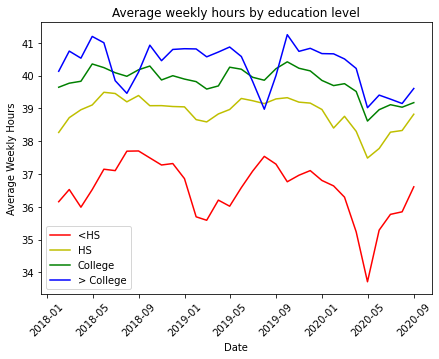

In [322]:
#Plotting average weekly hours by education level
plt.figure(figsize=(7,5))
edu_level_hrs_1 = avg_weekly_hours_educ[avg_weekly_hours_educ["EduLevel"] == 1]
plt.plot(dates,  edu_level_hrs_1["AHRSWORKT"], '-r', label='<HS')
edu_level_hrs_2 = avg_weekly_hours_educ[avg_weekly_hours_educ["EduLevel"] == 2]
plt.plot(dates, edu_level_hrs_2["AHRSWORKT"], '-y', label='HS')
edu_level_hrs_3 = avg_weekly_hours_educ[avg_weekly_hours_educ["EduLevel"] == 3]
plt.plot(dates, edu_level_hrs_3["AHRSWORKT"], '-g', label='College')
edu_level_hrs_4 = avg_weekly_hours_educ[avg_weekly_hours_educ["EduLevel"] == 4]
plt.plot(dates, edu_level_hrs_4["AHRSWORKT"], '-b', label='> College')

plt.title('Average weekly hours by education level')
plt.xlabel('Date')
plt.ylabel('Average Weekly Hours')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyHoursEDU.png')

plt.show()

In [298]:
# Average weekly hours by ability to telework
avg_weekly_hours_tele = employed[employed["AHRSWORKT"]<999]. groupby(["YEAR", "MONTH", "Telework"])["AHRSWORKT"].mean()
avg_weekly_hours_tele = avg_weekly_hours_tele.reset_index().drop(["YEAR", "MONTH"], axis=1)

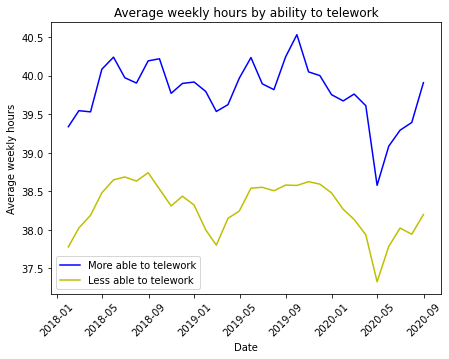

In [323]:
#Plotting Average weekly hours by ability to telework
plt.figure(figsize=(7,5))
tele_level_hrs_tw = avg_weekly_hours_tele[avg_weekly_hours_tele["Telework"] == 1]
plt.plot(dates, tele_level_hrs_tw["AHRSWORKT"], '-b', label='More able to telework')
tele_level_hrs_nottw = avg_weekly_hours_tele[avg_weekly_hours_tele["Telework"] == 0]
plt.plot(dates, tele_level_hrs_nottw["AHRSWORKT"], '-y', label='Less able to telework')
plt.title('Average weekly hours by ability to telework')
plt.xlabel('Date')
plt.ylabel('Average weekly hours')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyHoursTELEWORK.png')

plt.show()

In [300]:
#Average weekly hours by occupation
avg_weekly_hours_occ = employed[employed["AHRSWORKT"]<999]. groupby(["YEAR", "MONTH", "WorkerClass"])["AHRSWORKT"].mean()
avg_weekly_hours_occ = avg_weekly_hours_occ.reset_index().drop(["YEAR", "MONTH"], axis=1)

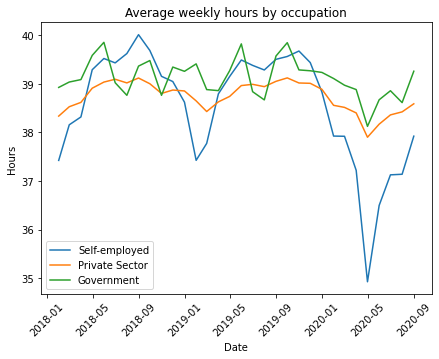

In [324]:
#Plotting average weekly hours by occupation
plt.figure(figsize=(7,5))
worker_hrs_1 = avg_weekly_hours_occ[avg_weekly_hours_occ["WorkerClass"] == 1]
plt.plot(dates, worker_hrs_1["AHRSWORKT"], label='Self-employed')
worker_rate_2 = avg_weekly_hours_occ[avg_weekly_hours_occ["WorkerClass"] == 2]
plt.plot(dates, worker_rate_2["AHRSWORKT"], label='Private Sector')
worker_rate_3 = avg_weekly_hours_occ[avg_weekly_hours_occ["WorkerClass"] == 3]
plt.plot(dates, worker_rate_3["AHRSWORKT"], label='Government')

plt.title('Average weekly hours by occupation')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyHoursOCC.png')

plt.show()

In [302]:
#Evolution of the weekly earnings
weekly_earnings = employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH"])["EARNWEEK"].mean()
weekly_earnings = weekly_earnings.reset_index().drop(["YEAR", "MONTH"], axis=1)

#Detrended evolution of the earnings
weekly_earnings["Date"] = dates
weekly_earnings = weekly_earnings.set_index("Date")

#We do the prediction for the weekly earnings
model_ear = LinearRegression()
model_ear.fit(monthly_dummies[:-8],weekly_earnings["EARNWEEK"][:-8])
predictions_ear = model_ear.predict(monthly_dummies[-8:])
predicted_ear = weekly_earnings["EARNWEEK"][:-8]
predicted_ear = pd.concat([predicted_ear, pd.Series(predictions_ear)])
predicted_ear = predicted_ear.reset_index()
predicted_ear = predicted_ear.drop(["index"], axis = 1)
predicted_ear["Date"] = dates
predicted_ear = predicted_ear.set_index("Date")

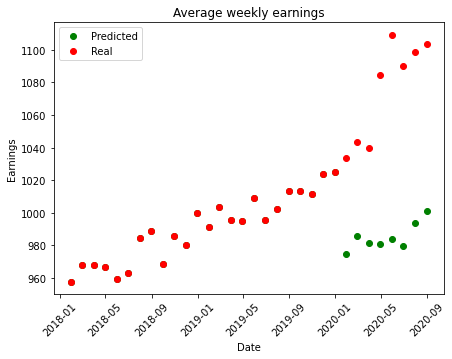

In [326]:
#Plot weekly earnings
plt.figure(figsize=(7,5))
plt.plot(dates, predicted_ear, 'og', label='Predicted')
plt.plot(dates, weekly_earnings, 'or', label='Real')
plt.title('Average weekly earnings')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyEarnings.png')

plt.show()

In [304]:
# Weekly earnings by education level
weekly_earnings_edu = employed[employed["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH", "EduLevel"])["EARNWEEK"].mean()
weekly_earnings_edu = weekly_earnings_edu.reset_index().drop(["YEAR", "MONTH"], axis=1)

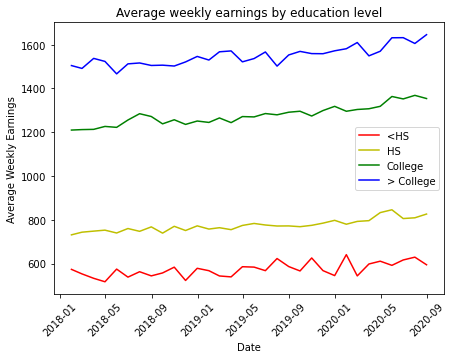

In [327]:
# Plot weekly earnings by education level
#Plotting average weekly hours by education level
plt.figure(figsize=(7,5))
edu_level_ear_1 = weekly_earnings_edu[weekly_earnings_edu["EduLevel"] == 1]
plt.plot(dates,  edu_level_ear_1["EARNWEEK"], '-r', label='<HS')
edu_level_ear_2 = weekly_earnings_edu[weekly_earnings_edu["EduLevel"] == 2]
plt.plot(dates, edu_level_ear_2["EARNWEEK"], '-y', label='HS')
edu_level_ear_3 = weekly_earnings_edu[weekly_earnings_edu["EduLevel"] == 3]
plt.plot(dates, edu_level_ear_3["EARNWEEK"], '-g', label='College')
edu_level_ear_4 = weekly_earnings_edu[weekly_earnings_edu["EduLevel"] == 4]
plt.plot(dates, edu_level_ear_4["EARNWEEK"], '-b', label='> College')

plt.title('Average weekly earnings by education level')
plt.xlabel('Date')
plt.ylabel('Average Weekly Earnings')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyEarningsEDU.png')

plt.show()

In [306]:
# Average weekly earnings by ability to telework
avg_weekly_ear_tele = employed[employed["EARNWEEK"]<9999.99]. groupby(["YEAR", "MONTH", "Telework"])["EARNWEEK"].mean()
avg_weekly_ear_tele = avg_weekly_ear_tele.reset_index().drop(["YEAR", "MONTH"], axis=1)

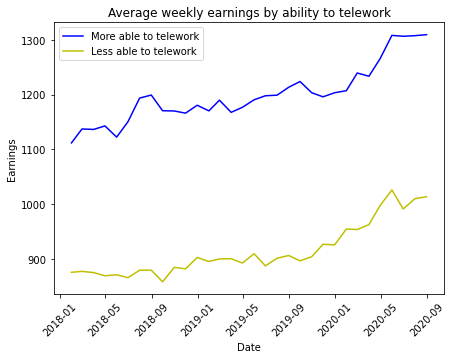

In [328]:
#Plotting Average weekly hours by ability to telework
plt.figure(figsize=(7,5))
tele_level_ear_tw = avg_weekly_ear_tele[avg_weekly_ear_tele["Telework"] == 1]
plt.plot(dates, tele_level_ear_tw["EARNWEEK"], '-b', label='More able to telework')
tele_level_ear_nottw = avg_weekly_ear_tele[avg_weekly_ear_tele["Telework"] == 0]
plt.plot(dates, tele_level_ear_nottw["EARNWEEK"], '-y', label='Less able to telework')
plt.title('Average weekly earnings by ability to telework')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyEarningsTELEWORK.png')

plt.show()

In [309]:
#Weekly earnings by occupation
avg_weekly_ear_occ = employed[employed["EARNWEEK"]<9999.99]. groupby(["YEAR", "MONTH", "WorkerClass"])["EARNWEEK"].mean()
avg_weekly_ear_occ = avg_weekly_ear_occ.reset_index().drop(["YEAR", "MONTH"], axis=1)
avg_weekly_ear_occ

,WorkerClass,EARNWEEK
0,2.0,939.589395
1,3.0,1047.795385
2,2.0,948.437853
3,3.0,1065.537965
4,2.0,947.332475
...,...,...
59,3.0,1187.196686
60,2.0,1079.907400
61,3.0,1194.565050
62,2.0,1076.507724


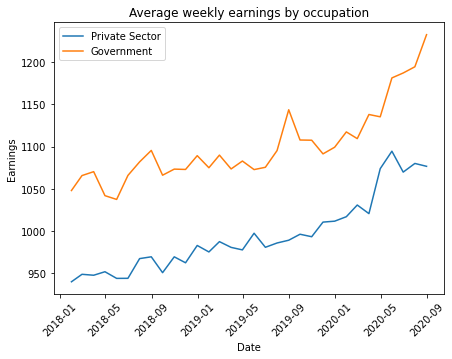

In [329]:
#Plotting average weekly earnings by occupation
plt.figure(figsize=(7,5))
#worker_ear_1 = avg_weekly_ear_occ[avg_weekly_ear_occ["WorkerClass"] == 1]
#plt.plot(dates, worker_ear_1["EARNWEEK"], label='Self-employed')
worker_ear_2 = avg_weekly_ear_occ[avg_weekly_ear_occ["WorkerClass"] == 2]
plt.plot(dates, worker_ear_2["EARNWEEK"], label='Private Sector')
worker_ear_3 = avg_weekly_ear_occ[avg_weekly_ear_occ["WorkerClass"] == 3]
plt.plot(dates, worker_ear_3["EARNWEEK"], label='Government')

plt.title('Average weekly earnings by occupation')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AverageWeeklyEarningsOCC.png')

plt.show()

In [209]:
#What has driven the change: aggregate employment or hours worked?
emp_diff = (emp_rate["EmpStatus"][-8:] - predicted_emp[0][-8:]) / emp_rate["EmpStatus"][-8:]
hrs_diff = (avg_weekly_hours["AHRSWORKT"][-8:] - predicted_hrs[0][-8:]) / avg_weekly_hours["AHRSWORKT"][-8:]

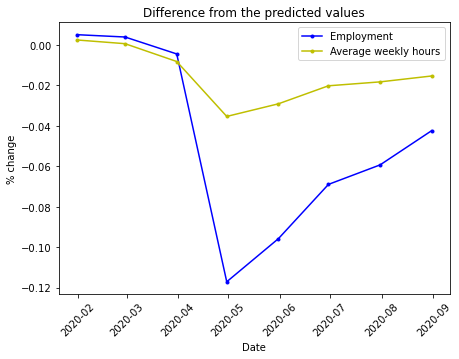

In [325]:
#Plotting the change in employment vs change in aggregate hours worked
plt.figure(figsize=(7,5))
plt.plot(dates[-8:], emp_diff, '.-b', label='Employment')
plt.plot(dates[-8:], hrs_diff, '.-y', label='Average weekly hours')
plt.title('Difference from the predicted values')
plt.xlabel('Date')
plt.ylabel('% change')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('Difference.png')

plt.show()